In [22]:
import pandas
df = pandas.read_csv("d1.csv", sep=";")
df = df[df['product'] == 'STARFRUIT']
df = df["mid_price"]

# convert to list
data = df.values.tolist()

<Axes: >

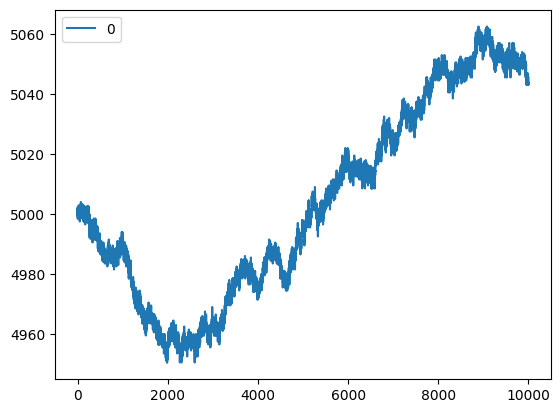

In [23]:
import matplotlib.pyplot as plt
df = pandas.DataFrame(data)
df.plot()

<Axes: >

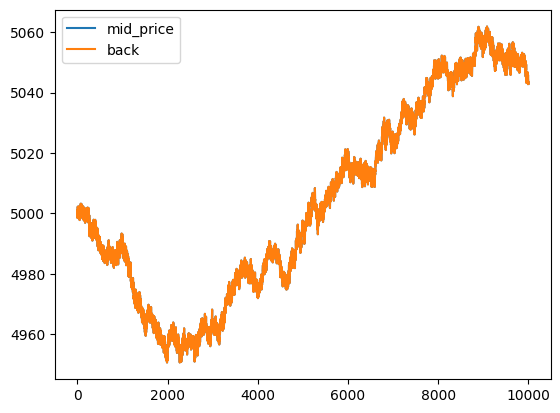

In [29]:
import numpy as np

coef = [-0.01869561,  0.0455032 ,  0.16316049,  0.8090892]
intercept = 4.481696494462085

def evaluate(a, b, c, d, intercept):
  coef = [a, b, c, d]
  back = []
  last4 = []
  for i in range(0, len(data)):
    if i < 4:
      last4.append(data[i])
      back.append(None)
    else:
      price = intercept
      for j in range(4):
        price += coef[j] * last4[j]
      back.append(price)
      last4.pop(0)
      last4.append(data[i])
  return 1 - np.corrcoef(data[4:], back[4:])[0, 1]
  

# df2 = pandas.DataFrame(back)

# # graph df and df2 on the same plot
# df = df.rename(columns={0: "mid_price"})
# df2 = df2.rename(columns={0: "back"})
# df = df.join(df2)
# df.plot()



In [30]:
# correlation coeff between mid_price and back
import numpy as np
np.corrcoef(data[4:], back[4:])[0, 1]


0.9988384433195832

In [38]:
import skopt
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args

space  = [Real(-1, 1, name='a'),
          Real(-1, 1, name='b'),
          Real(-1, 1, name='c'),
          Real(-1, 1, name='d'), 
          Real(-100, 100, name='intercept')]
@use_named_args(space)
def objective(a, b, c, d, intercept):
    return evaluate(a, b, c, d, intercept)

res = gp_minimize(objective, space, n_calls=100, random_state=0)
print(res.x)
print(1-res.fun)



zsh:1: command not found: pkexec


ModuleNotFoundError: No module named 'skopt'